C:\Users\mateo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] El sistema no puede encontrar el archivo especificado
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\mateo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.13_3.13.1008.0_x64__qbz5n2kfra8p0\Lib\subprocess.py", line 554,

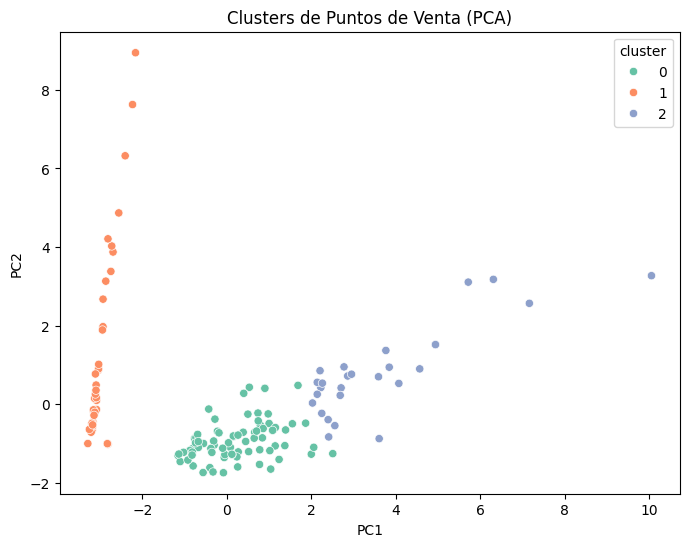

Resumen por cluster:
                canal  capturas_tarjetas  aprobacion_tarjetas    tarjetas  \
cluster                                                                     
0        4.152861e+05         300.142857             0.212685   56.590909   
1        5.005003e+07         829.287500             0.207209  165.675000   
2        3.475431e+05         869.731481             0.226674  178.148148   

         capturas_creditos  aprobacion_creditos  cantidad_creditos  \
cluster                                                              
0               107.019481             0.030568           8.525974   
1                 0.006250             0.000000           0.000000   
2               295.407407             0.037129          29.740741   

         monto_creditos     seguros  trafico_transaccional  trafico_clientes  \
cluster                                                                        
0             22.506087   54.483766           69009.194805      42585.551948   
1 

<Figure size 640x480 with 0 Axes>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# 1. Cargar archivo
df = pd.read_excel("Segmentacion_CATT.xlsx")

# 2. Filtrar solo variables numéricas
df_numerico = df.select_dtypes(include=['float64', 'int64'])

# 3. Imputar valores faltantes con la media
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(df_numerico)

# 4. Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# 5. Aplicar KMeans
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# 6. Crear un DataFrame limpio con los clusters
df_cluster = df_numerico.copy()
df_cluster["cluster"] = clusters

# 7. Visualizar clusters con PCA
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)
df_cluster["PC1"] = components[:, 0]
df_cluster["PC2"] = components[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_cluster, x='PC1', y='PC2', hue='cluster', palette='Set2')
plt.title("Clusters de Puntos de Venta (PCA)")
plt.show()

# 8. Resumen por cluster
resumen = df_cluster.groupby("cluster").mean(numeric_only=True)
print("Resumen por cluster:")
plt.savefig("grafica_segmentacion.png", dpi=300)
print(resumen)

In [ ]:
df_cluster["ID"] = df_cluster.index

In [ ]:
df_cluster.to_excel('resumen_segmentacion.xlsx',index=False)